## Generating Line Flux Maps

In [2]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs

import matplotlib.pyplot as plt

from hetdex_tools.interpolate import make_narrowband_image
from hetdex_tools.phot_tools import fit_circular_aperture

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline

### Make a collapased wavelength image at the line detection wavelength and coordinate

In [5]:
detectid=3004616956
hdu = make_narrowband_image(detectid=detectid, 
                            include_error=True, 
                            imsize=20.*u.arcsec,
                            convolve_image=False)

In [6]:
im = hdu[0].data
w = wcs.WCS(hdu[0].header)

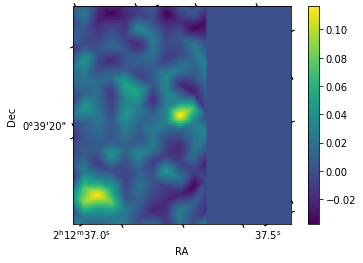

In [9]:
plt.subplot(111, projection=w)
plt.imshow(im)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.colorbar()

In [10]:
coords = SkyCoord( ra = hdu[0].header['CRVAL1']*u.deg, dec=hdu[0].header['CRVAL2']*u.deg)

### Can fit a circular aperture to the detection to get the line image S/N relative to sky background in an annulus around the detection

Signal-to-noise in circular aperture is 3.834


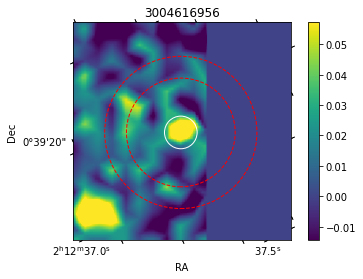

In [11]:
flux, flux_err, bkg_stddev, apcor = fit_circular_aperture(hdu, coords, 
                                                          radius=1.5*u.arcsec, 
                                                          annulus=[5,7]*u.arcsec,
                                                          plot=True, plottitle=str(detectid))
print('Signal-to-noise in circular aperture is {:5.3f}'.format(flux/bkg_stddev))

To save the datacube:

In [13]:
hdu.writeto('{}_line_flux_map.fits'.format(detectid), overwrite=True)

## For get_line_image Options:

In [14]:
help(make_narrowband_image)

Help on function make_narrowband_image in module hetdex_tools.interpolate:

make_narrowband_image(detectid=None, coords=None, shotid=None, pixscale=<Quantity 0.25 arcsec>, imsize=<Quantity 30. arcsec>, wave_range=None, convolve_image=False, ffsky=True, subcont=False, dcont=50.0, include_error=False, survey='hdr3', extract_class=None)
    Function to make narrowband image from either a detectid or from a
    coordinate/shotid combination.
    
    Paramaters
    ----------
    detectid: int
        detectid from the continuum or lines catalog. Default is
        None. Provide a coords/shotid combo if this isn't given
    coords: SkyCoords object
        coordinates to define the centre of the data cube
    pixscale: astropy angle quantity
         plate scale
    imsize: astropy angle quantity
        image size
    wave_range: list or None
        start and stop value for the wavelength range in Angstrom.
        If not given, the detectid linewidth is used
    convolve_image: bool
   